In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
nameToDataFrame = {}

x = os.listdir('./Data/Stocks')
x.sort()

for file in x:
    #print("Reading: ", os.path.join('/kaggle/input/price-volume-data-for-all-us-stocks-etfs/Stocks',file))
    try:
        nameToDataFrame[file[:-7]] = pd.read_csv(os.path.join('./Data/Stocks/',file), parse_dates=['Date'])
    except:
        print("Unable to read: ", file)

Unable to read:  accp.us.txt
Unable to read:  amrh.us.txt
Unable to read:  amrhw.us.txt
Unable to read:  asns.us.txt
Unable to read:  bbrx.us.txt
Unable to read:  bolt.us.txt
Unable to read:  boxl.us.txt
Unable to read:  bxg.us.txt
Unable to read:  ehr.us.txt
Unable to read:  fmax.us.txt
Unable to read:  gnst.us.txt
Unable to read:  hayu.us.txt
Unable to read:  jt.us.txt
Unable to read:  mapi.us.txt
Unable to read:  molc.us.txt
Unable to read:  otg.us.txt
Unable to read:  pbio.us.txt
Unable to read:  pxus.us.txt
Unable to read:  rbio.us.txt
Unable to read:  sail.us.txt
Unable to read:  sbt.us.txt
Unable to read:  scci.us.txt
Unable to read:  scph.us.txt
Unable to read:  send.us.txt
Unable to read:  sfix.us.txt
Unable to read:  srva.us.txt
Unable to read:  stnl.us.txt
Unable to read:  vist.us.txt
Unable to read:  vmet.us.txt
Unable to read:  wnfm.us.txt
Unable to read:  wspt.us.txt
Unable to read:  znwaa.us.txt


In [3]:
def getOnlyStocksWithDatesInRange(startDate, endDate, dataSize):
    for name in list(nameToDataFrame):
        temp = nameToDataFrame[name].loc[(nameToDataFrame[name]['Date'] >= startDate) & (nameToDataFrame[name]['Date'] <= endDate)]
        if(temp.shape[0] != dataSize):
            del nameToDataFrame[name]
        else:
            nameToDataFrame[name] = temp
        
getOnlyStocksWithDatesInRange(np.datetime64('2010-10-01'),np.datetime64('2010-12-31'), 64);

In [4]:
def convertDataFramesToSingleDataFrame():
    columns = ['Ticker'] + [x.strftime('%Y-%m-%d') for x in nameToDataFrame['aapl'].loc[:,'Date'][1:]]
    output = pd.DataFrame(columns = columns)
    index = 0
    for ticker in nameToDataFrame:
        row = [ticker]
        array = nameToDataFrame[ticker].loc[:,'Close'].to_numpy()
        for i in range(1,len(nameToDataFrame[ticker].loc[:,'Close'])):
            row.append((array[i] - array[i-1])/array[i-1])
        output.loc[index] = row
        index += 1
    return output
stocks = convertDataFramesToSingleDataFrame()
stocks

,Ticker,2010-10-04,2010-10-05,2010-10-06,2010-10-07,2010-10-08,2010-10-11,2010-10-12,2010-10-13,2010-10-14,...,2010-12-17,2010-12-20,2010-12-21,2010-12-22,2010-12-23,2010-12-27,2010-12-28,2010-12-29,2010-12-30,2010-12-31
0,a,-0.033860,0.013819,-0.011164,0.016278,0.017981,-0.001403,-0.002107,0.018605,-0.002245,...,0.020168,0.002229,0.004849,0.005697,0.000253,0.020740,-0.009894,0.004390,-0.002381,-0.003918
1,aa,-0.025571,0.018687,0.018778,-0.013553,0.056565,0.003121,0.020741,0.012917,-0.018162,...,0.006856,0.014540,0.008009,0.016855,0.013096,-0.007088,0.001321,-0.008103,0.005288,0.012315
2,aaba,0.000701,0.023109,-0.006160,-0.019972,0.018271,-0.005521,0.001388,0.056826,0.044590,...,-0.007874,-0.006105,0.019656,0.001807,0.005412,-0.014354,-0.003034,0.010956,0.009031,-0.007757
3,aan,-0.011057,-0.046200,0.002916,-0.006349,0.008658,0.011130,0.006967,0.010233,-0.002302,...,-0.018456,-0.013409,0.013081,-0.011903,0.005564,0.010914,-0.013758,0.013390,-0.000502,0.006082
4,aaon,-0.013674,0.056296,-0.003746,-0.025875,0.007127,0.006277,0.022131,0.015154,0.002355,...,-0.012099,0.009464,0.001065,-0.000739,0.007743,0.001368,-0.007264,0.002927,0.000000,-0.022522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3258,zixi,-0.017730,0.000000,-0.007220,0.000000,0.021818,0.010676,0.038732,0.016949,-0.006667,...,0.021635,-0.014118,0.014320,-0.016471,0.009569,0.063981,-0.051225,0.004695,0.007009,-0.009281
3259,zn,-0.034884,0.028112,0.019531,-0.007663,0.005792,0.003839,0.005736,-0.007605,0.015326,...,-0.008421,-0.029724,0.013129,0.032397,-0.018828,-0.008529,0.015054,-0.012712,0.015021,0.010571
3260,znh,0.026781,0.024401,-0.032981,-0.005053,0.039714,0.022896,0.006976,0.107250,-0.039247,...,0.032662,-0.020631,0.010164,0.050024,-0.033384,-0.002438,-0.010258,0.015587,0.034483,0.006628
3261,ztr,-0.002639,0.008048,-0.002666,0.000000,0.005140,0.002741,0.000000,-0.002734,0.002741,...,0.002691,-0.005518,0.005548,0.003027,0.005650,0.000000,-0.005618,-0.001308,-0.002829,0.008211


In [5]:
def k_means_clustering(data, k):
    randomSample = data.sample(k).to_numpy()
    centroids = randomSample[:,1:]
    centroid_sum = np.zeros((k, len(centroids[0])))
    centroid_count = np.zeros(k)
    for iteration in range(10):
        print(iteration)
        for index, row in data.iterrows():
            min_centroid = -1
            min_centroid_dist = float('inf')
            dist = 0
            for i, centroid in enumerate(centroids):
                dist = 0
                for j in range(len(centroid)):
                    dist += (row[j+1] - centroid[j])**2
                if(dist < min_centroid_dist):
                    min_centroid_dist = dist
                    min_centroid = i
            centroid_sum[min_centroid] = np.add(centroid_sum[min_centroid],row.to_numpy()[1:])
            centroid_count[min_centroid] += 1
        for i in range(len(centroids)):
            if(centroid_count[i] == 0):
                print("uh oh, empty centroid", i)
            centroids[i] = centroid_sum[i] / centroid_count[i]
    output = []
    for index, row in data.iterrows():
        min_centroid = -1
        min_centroid_dist = float('inf')
        for i, centroid in enumerate(centroids):
            dist = 0
            for j in range(len(centroid)):
                dist += (row[j+1] - centroid[j])**2
            if(dist < min_centroid_dist):
                min_centroid_dist = dist
                min_centroid = i
        output.append((row[0], min_centroid))
    return output
        
clustering = k_means_clustering(stocks, 5)

0
1
2
3
4
5
6
7
8
9


In [6]:
cluster_set = {}

for i in range(5):
    cluster_set[i] = []

for ticker, cluster in clustering:
        cluster_set[cluster].append(ticker)

cluster_subset = {}
for i in range(5):
    if(len(cluster_set[i]) < 10):
        cluster_subset[i] = random.sample(cluster_set[i], k=len(cluster_set[i]))
    else:
        cluster_subset[i] = random.sample(cluster_set[i], k=5)
    print(cluster_subset[i])

['phm', 'lub', 'znh', 'kndi', 'ap']
['tpc', 'gco', 'ca', 'hun', 'shi']
['rprx', 'ufi']
['nuv', 'cem', 'gut', 'fdef', 'payx']
['inuv']


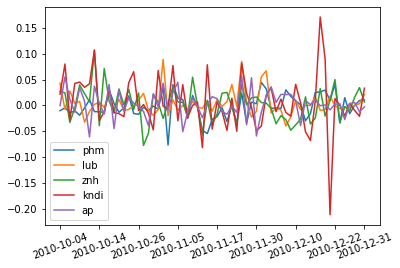

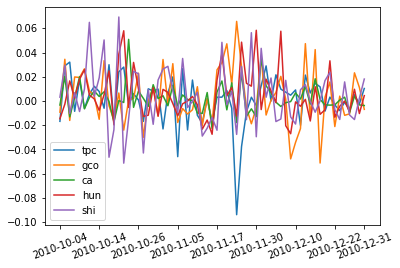

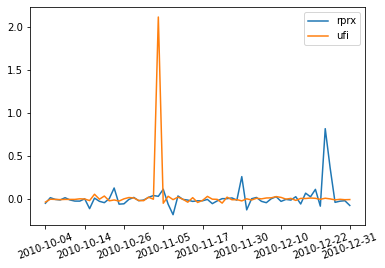

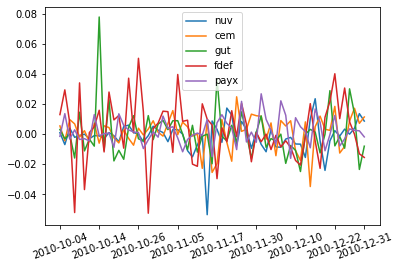

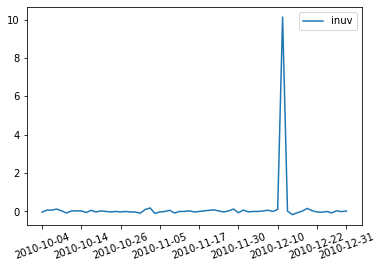

In [8]:
import matplotlib.pyplot as plt

dates = stocks.columns.to_numpy()[1:]
for i in range(5):
    for ticker in cluster_subset[i]:
        plt.plot(dates, stocks.loc[stocks['Ticker'] == ticker].to_numpy()[0,1:], label=ticker)
    plt.xticks([0,8,16,24,32,40,48,56,62], rotation=20)
    plt.legend()
    plt.show()
    